In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
#import libraries
from powerbiclient import QuickVisualize,get_dataset_config,Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication
# Authenticate to Power BI service using InteractiveLoginAuthentication
from powerbiclient.authentication import InteractiveLoginAuthentication
import pandas as pd

In [3]:
# import csv file
df = pd.read_csv('Product_Analysis.csv', encoding= 'unicode_escape')

In [5]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
auth=DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code N4Y8FLWZF to authenticate.


In [6]:
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [10]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

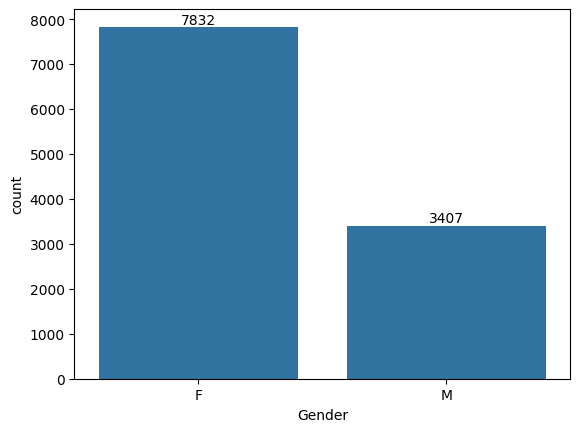

In [18]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

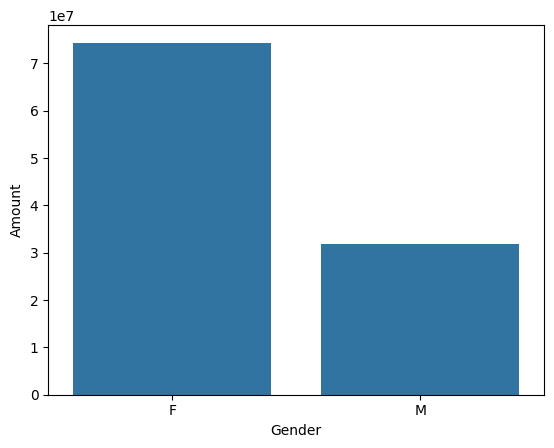

In [19]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

<Axes: xlabel='State', ylabel='Orders'>

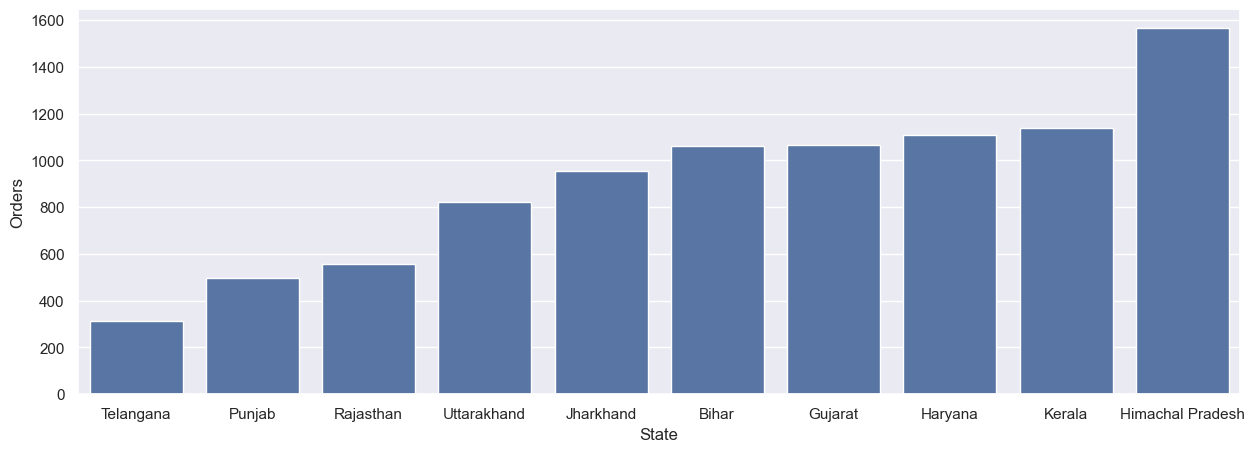

In [21]:
sasales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=True).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sasales_state, x = 'State',y= 'Orders')

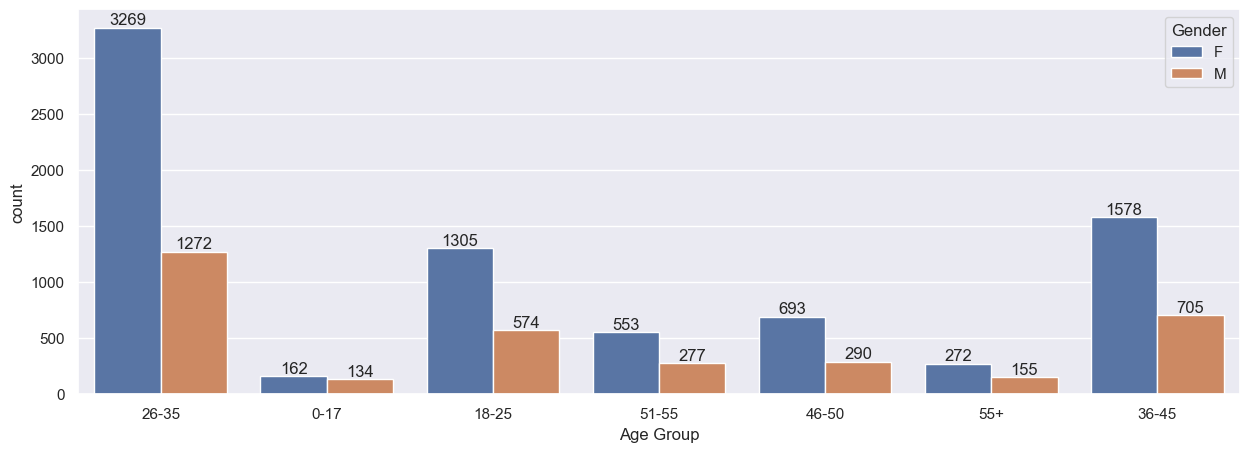

In [22]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

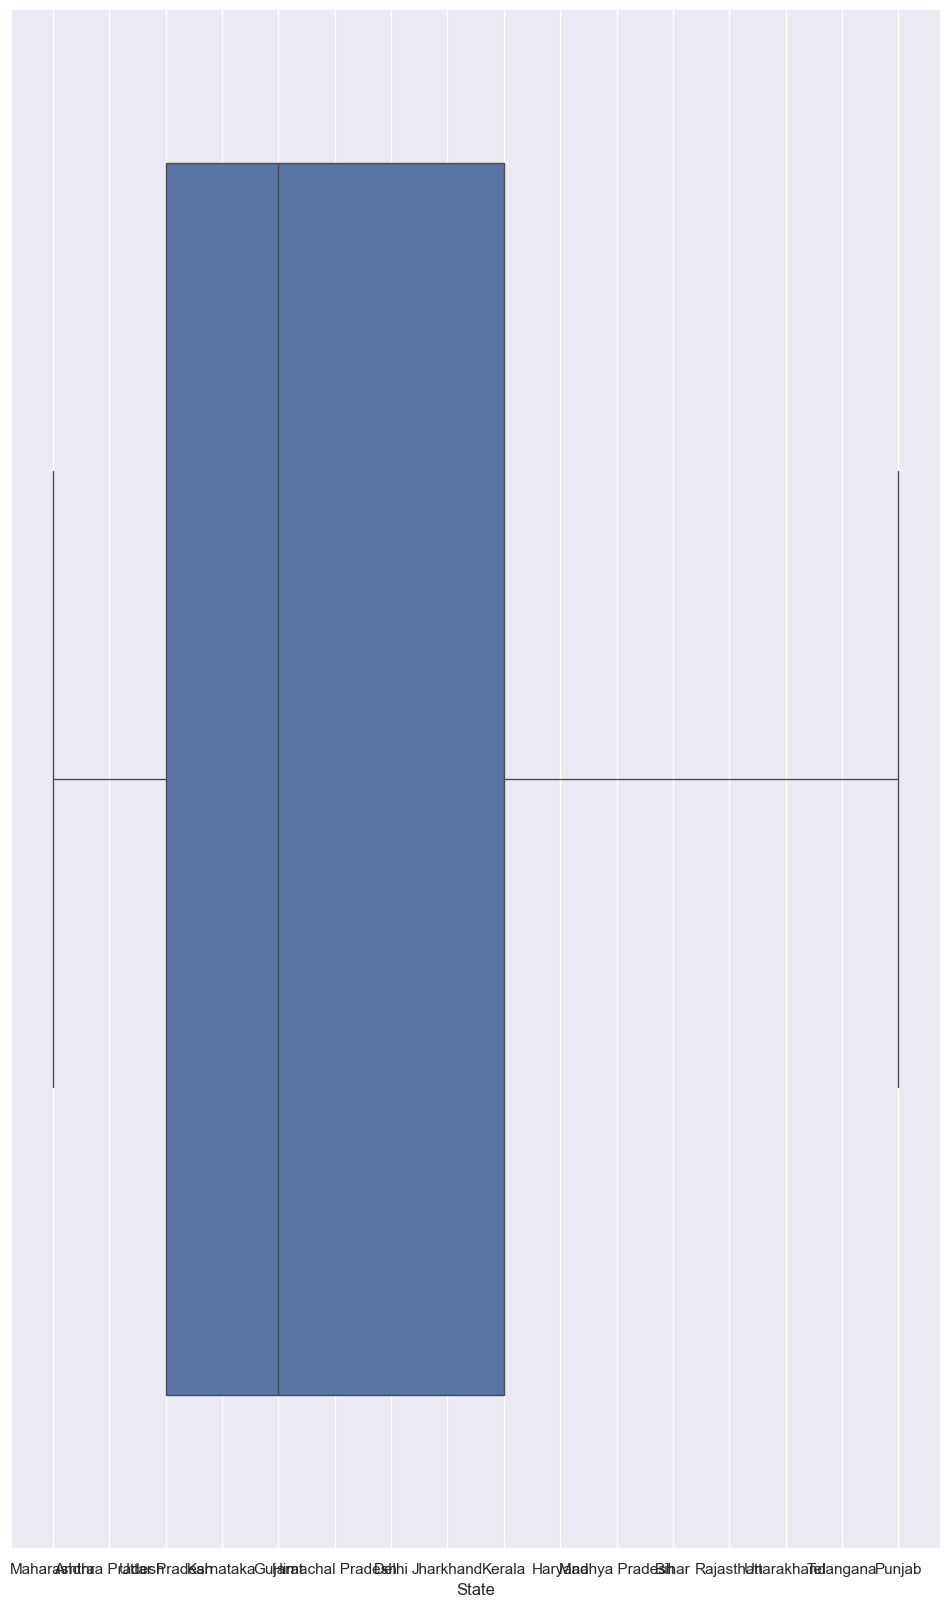

In [30]:
sns.boxplot(data=df,x="State")
sns.set(rc={'figure.figsize':(15,40)})
plt.show()

### Age

<Axes: xlabel='Age Group', ylabel='Amount'>

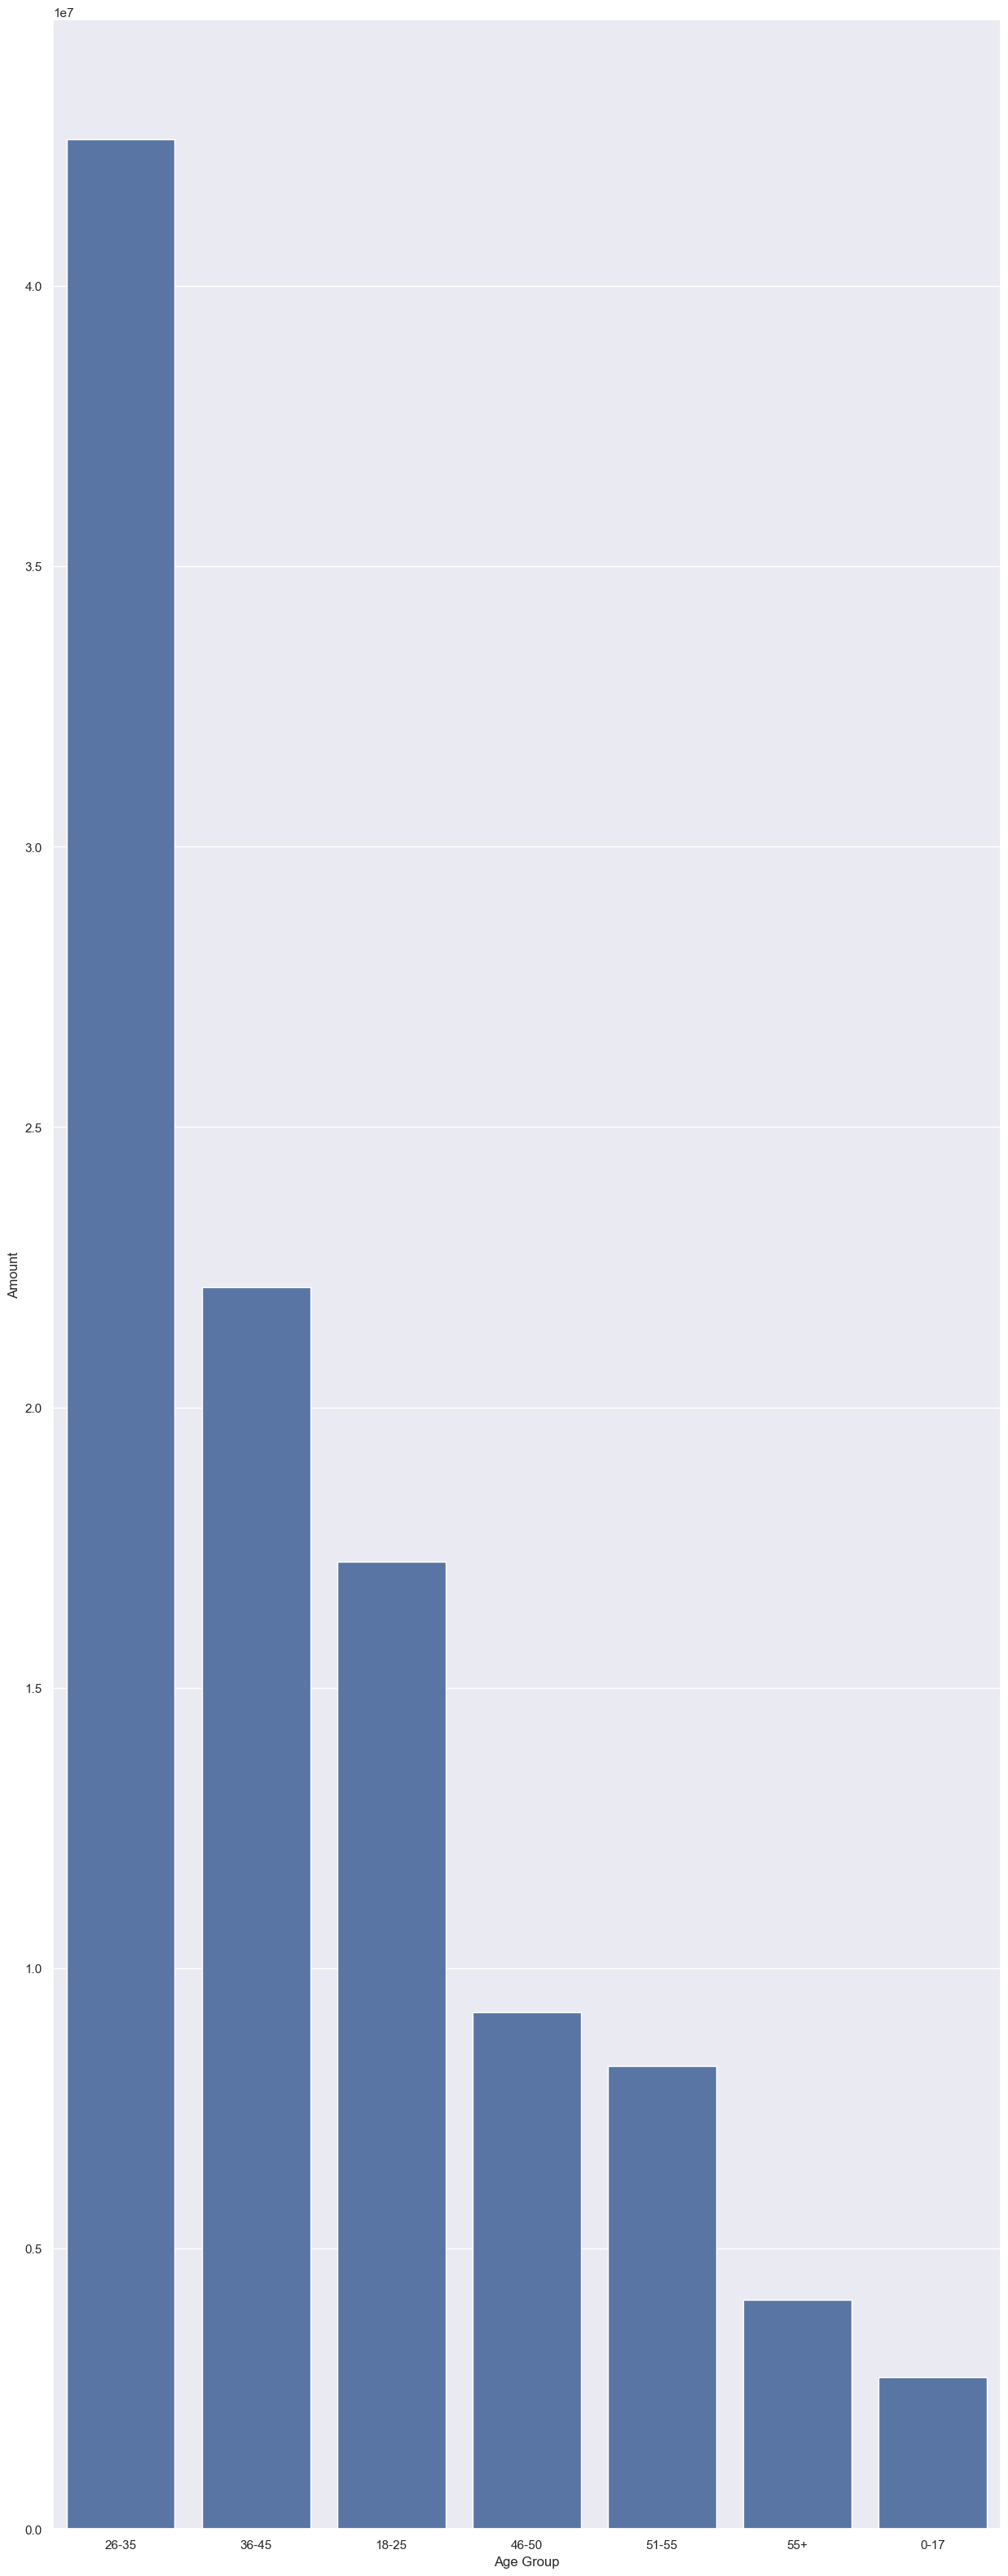

In [31]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

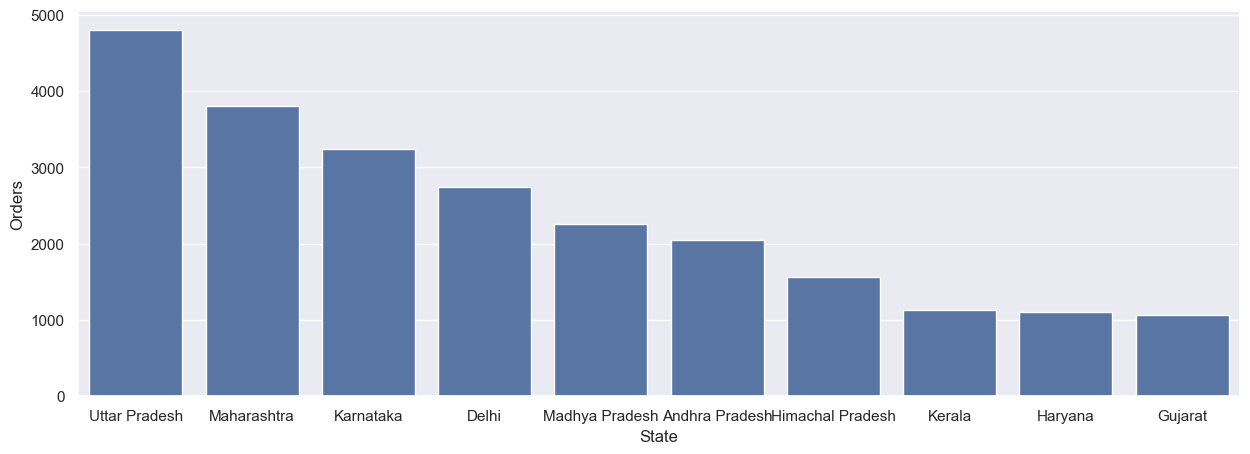

In [32]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

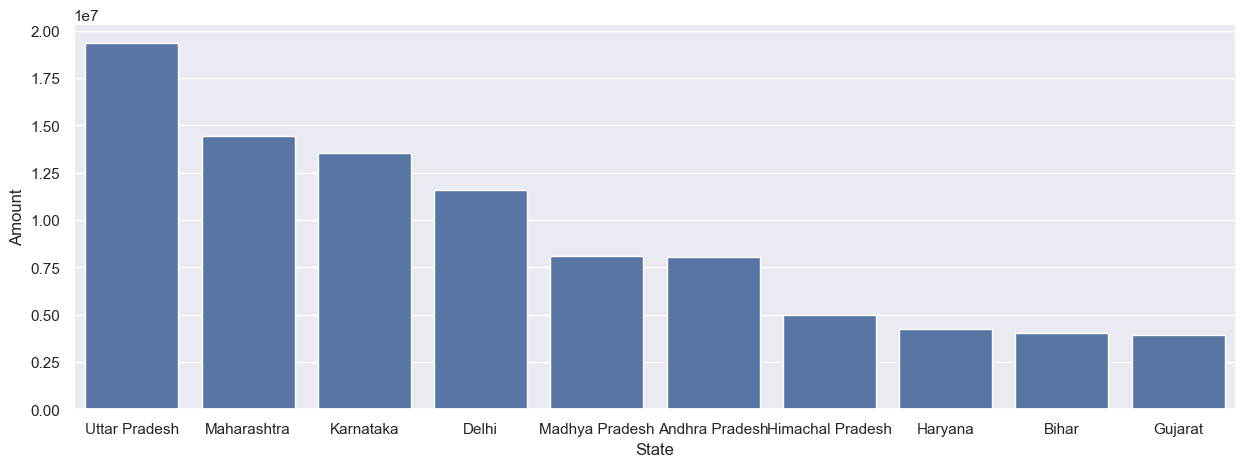

In [33]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

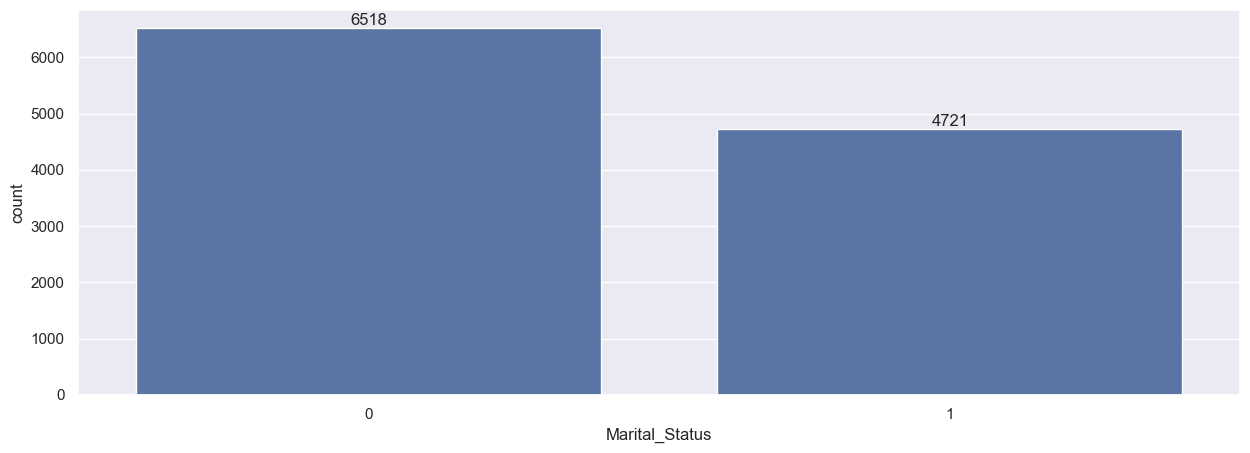

In [34]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

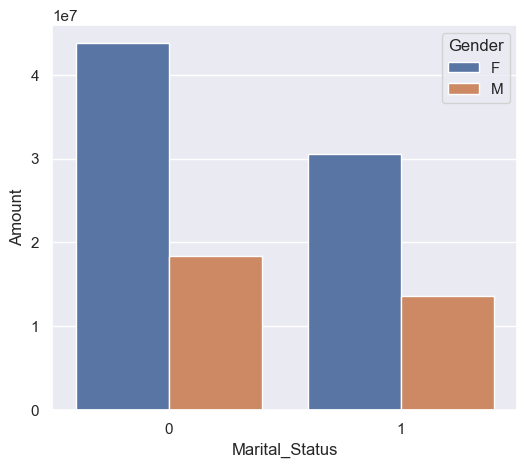

In [35]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

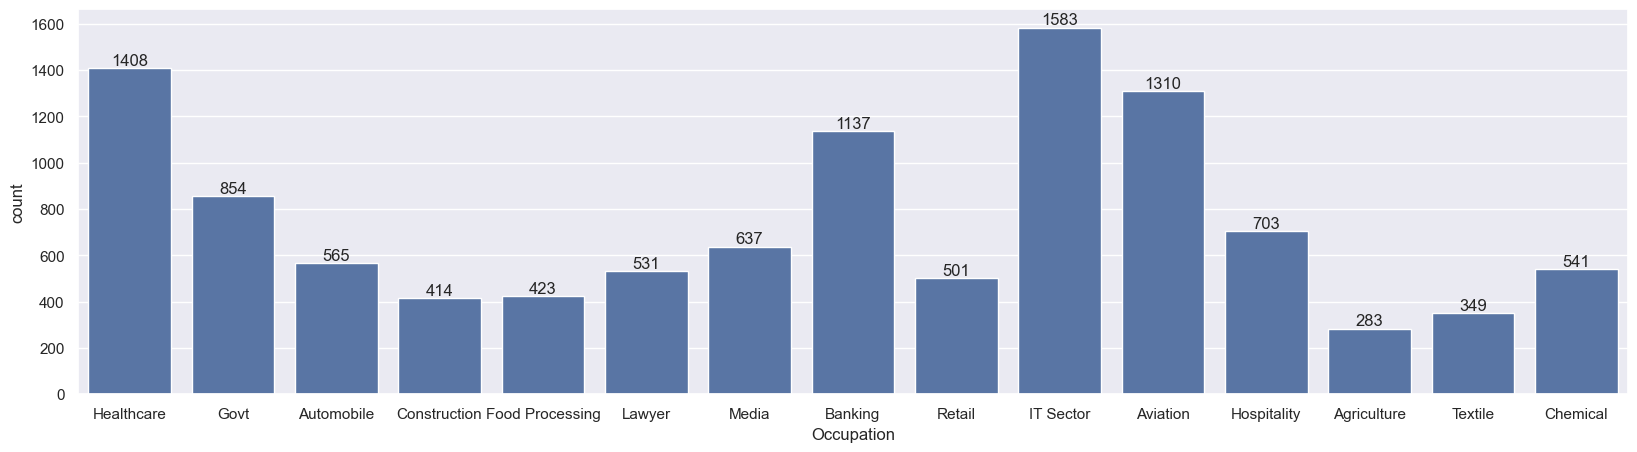

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

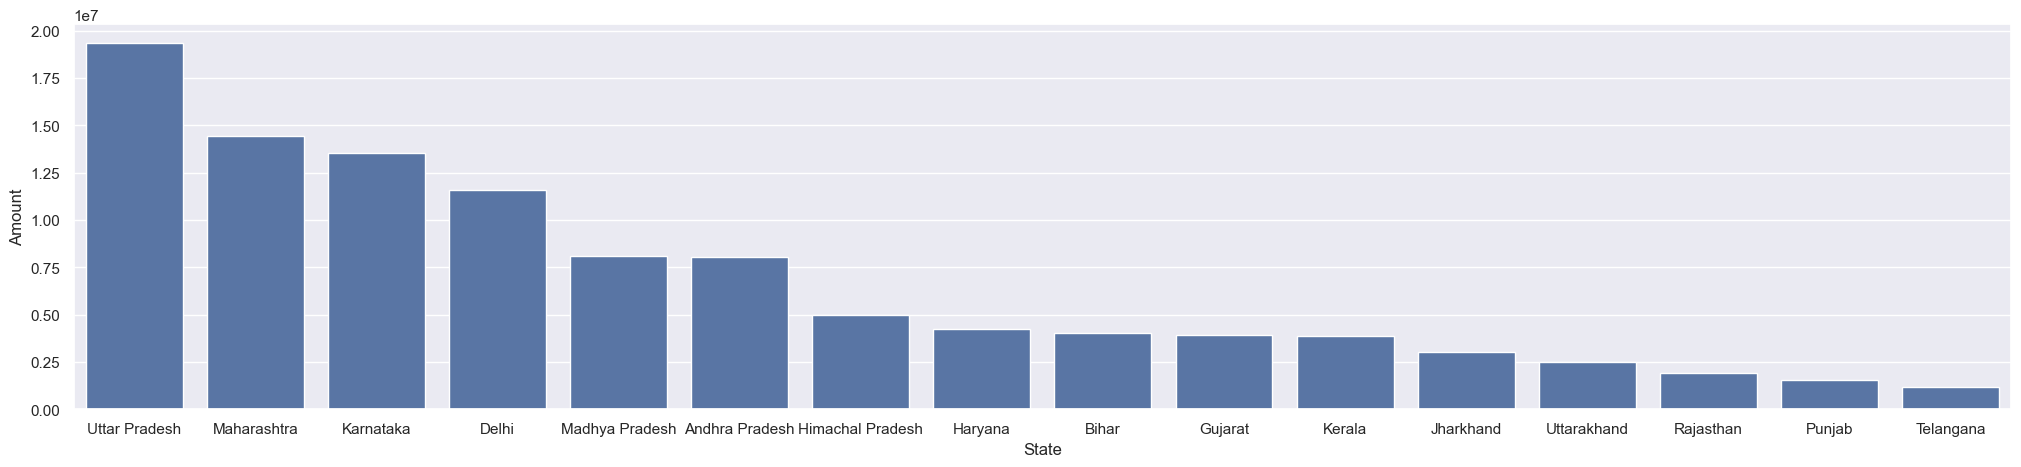

In [37]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

<Axes: xlabel='State', ylabel='Orders'>

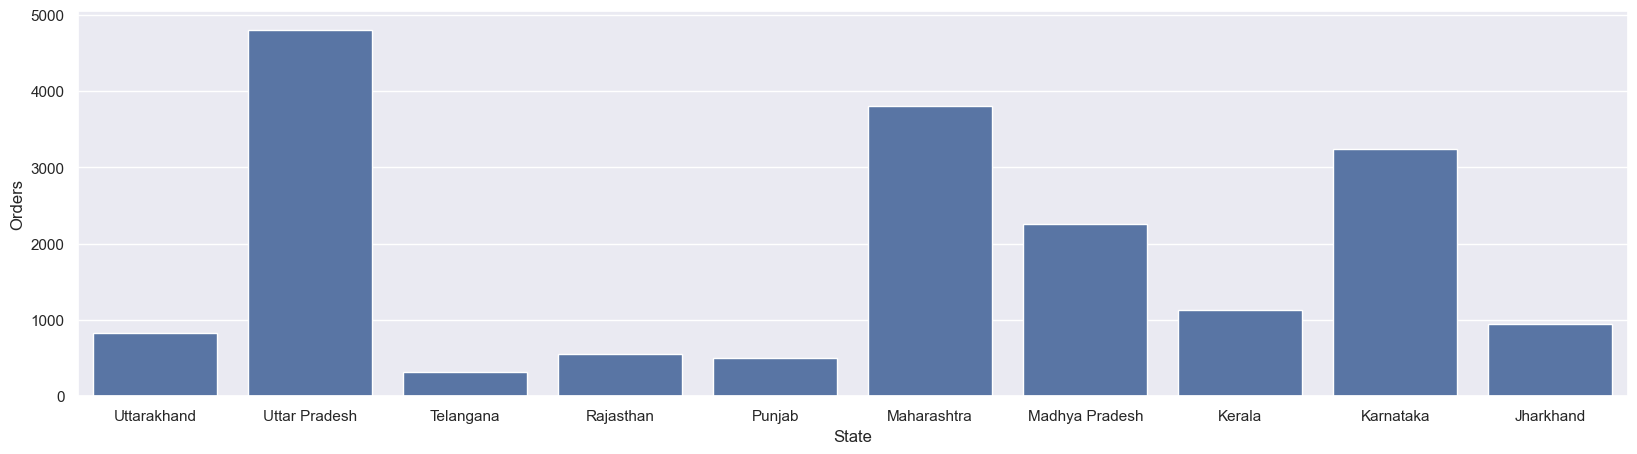

In [39]:
sales2_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='State', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales2_state, x = 'State',y= 'Orders')

### Product Category

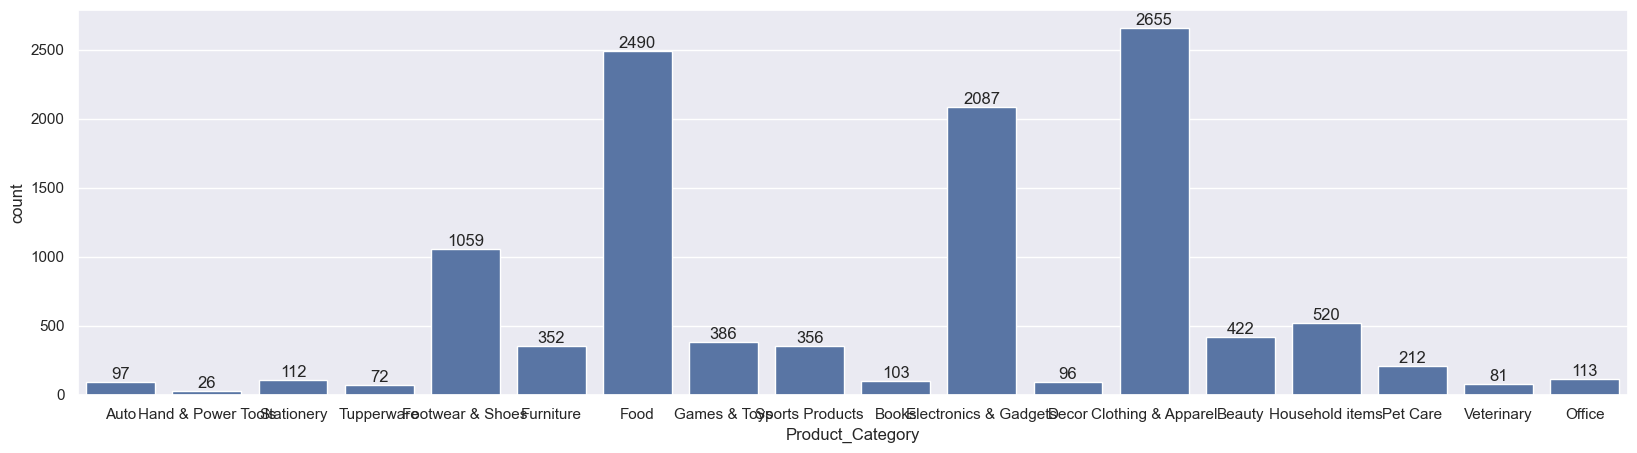

In [40]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

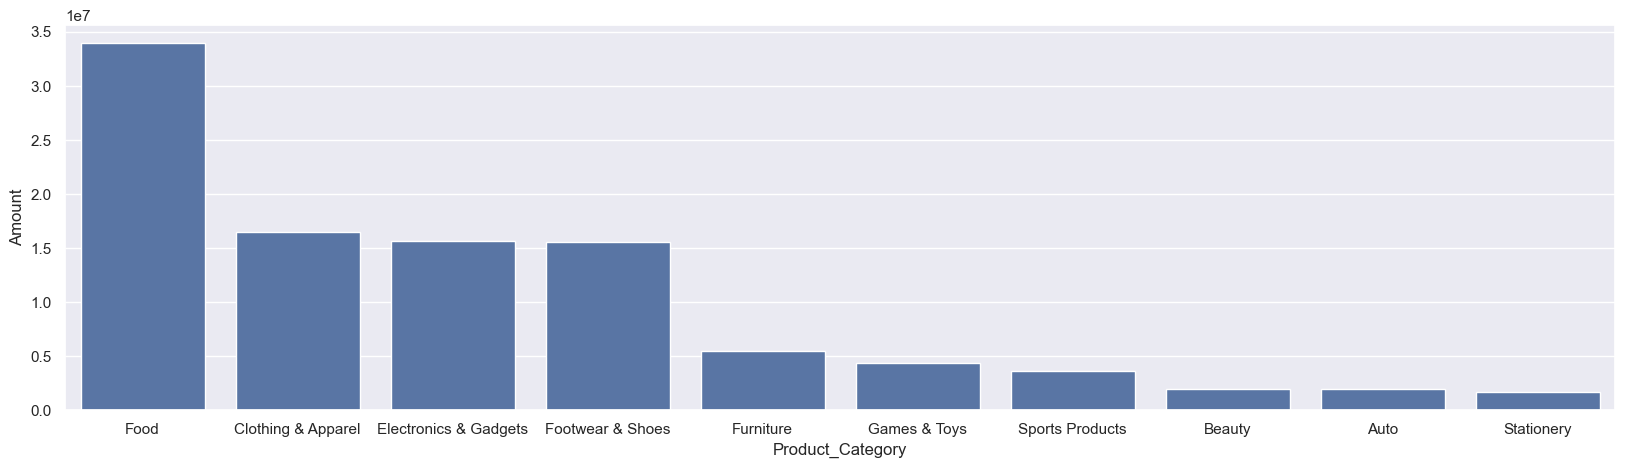

In [41]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

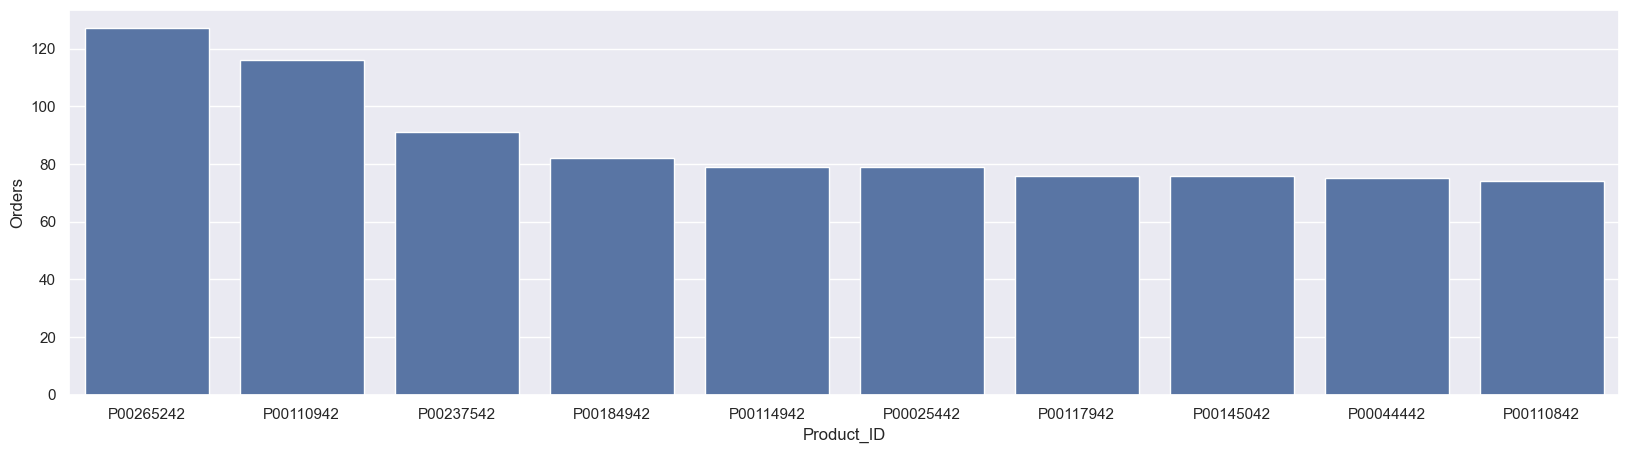

In [42]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

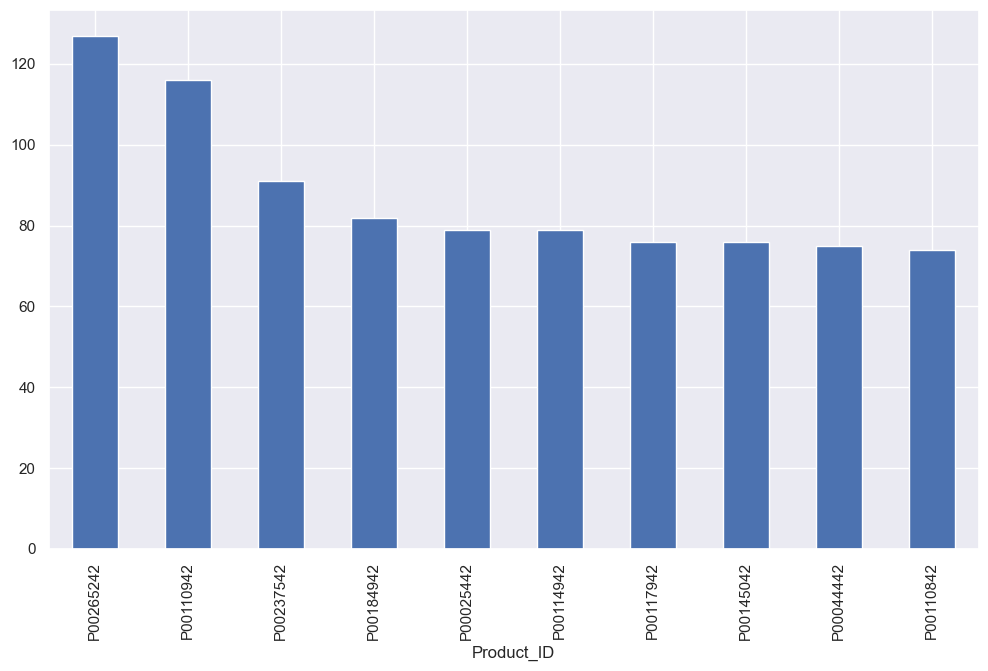

In [43]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

[7832, 3407]


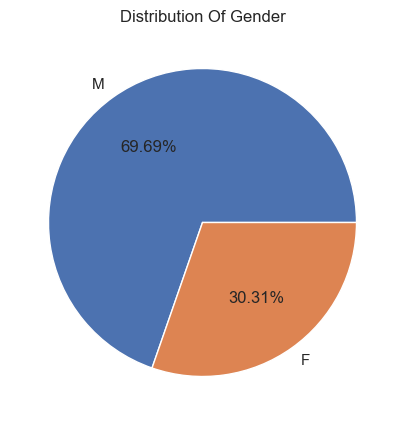

In [46]:
F=df.loc[(df['Gender']=="F")].count()
M=df.loc[(df['Gender']=="M")].count()
# groupC=df.loc[(df['EthnicGroup']=="group C")].count()
# groupD=df.loc[(df['EthnicGroup']=="group D")].count()
# groupE=df.loc[(df['EthnicGroup']=="group E")].count()

l=["M","F"]
mlist=[F["Gender"],M["Gender"]]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
print(mlist)
plt.title("Distribution Of Gender")
plt.show()

          Orders
Gender          
F       2.495914
M       2.475198


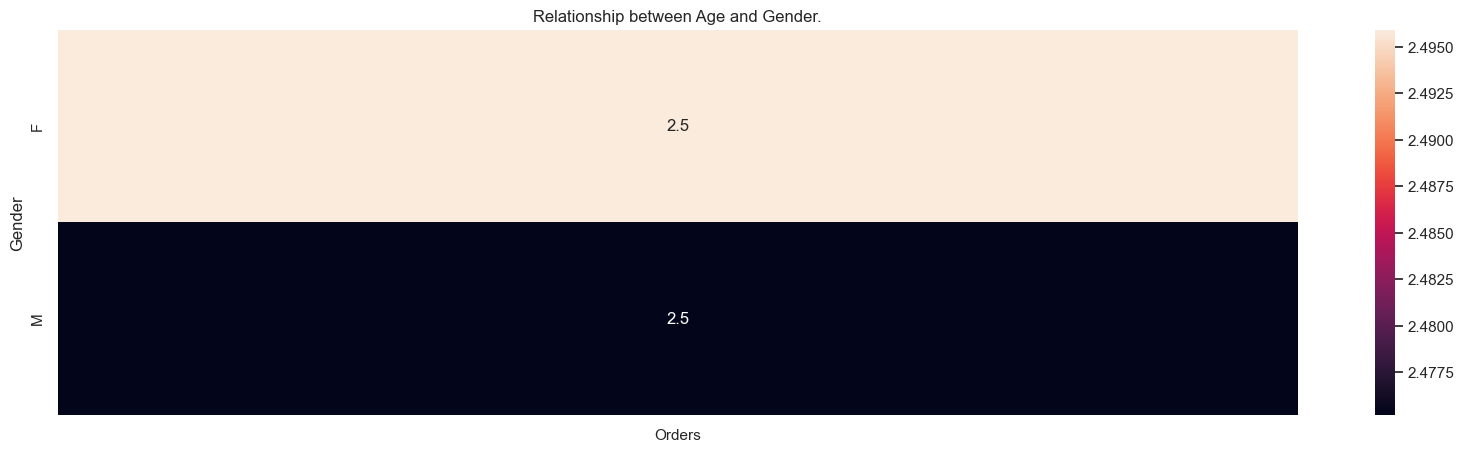

In [72]:
# # F=df.loc[(df['State']=="F")].count()
# # M=df.loc[(df['State']=="M")].count()
# Maharashtra=df.loc[(df['State']=="Maharashtra")].count()
# AndhraPradesh=df.loc[(df['State']=="AndhraPradesh")].count()
# UttarPradesh=df.loc[(df['State']=="UttarPradesh")].count()
# Karnataka=df.loc[(df['State']=="Karnataka")].count()
# # groupD=df.loc[(df['State']=="group D")].count()
# # groupE=df.loc[(df['State']=="group E")].count()
# # groupC=df.loc[(df['State']=="group C")].count()
# # groupD=df.loc[(df['State']=="group D")].count()
# # groupE=df.loc[(df['State']=="group E")].count()

# l1=["Maharashtra","AndhraPradesh","Uttar Pradesh","Karnataka"]["State"]
# mlist=[Maharashtra["State"],AndhraPradesh["State"],UttarPradesh["State"],Karnataka["State"]]
# plt1.pie(mlist1,labels=l,autopct="%1.2f%%")
# print(mlist1)
# plt.title("Distribution Of State")
# plt.show()

gb1 = df.groupby("Gender").agg({"Orders":'mean'})
print(gb1)
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Orders and Gender.")
plt.show()

# groupC=df.loc[(df['EthnicGroup']=="group C")].count()
# groupD=df.loc[(df['EthnicGroup']=="group D")].count()
# groupE=df.loc[(df['EthnicGroup']=="group E")].count()

# l1=["Auto","Veterinary","Office"]
# mlist1=[Veterinary["Product_Category"],Auto["Product_Category"],Office["Product_Category"]]
# plt.pie(mlist1,labels=l,autopct="%1.2f%%")
# print(mlist1)
# plt.title("Distribution Of Product")
# plt.show()


# Maharashtra
# Andhra Pradesh
# Uttar Pradesh
# Karnataka
# Gujarat
# Himachal Pradesh
# Uttar Pradesh
# Maharashtra
# Uttar Pradesh
# Andhra Pradesh
# Delhi
# Andhra Pradesh
# Andhra Pradesh
# Andhra Pradesh
# Madhya Pradesh


                    Orders
State                     
Andhra Pradesh    2.528977
Bihar             2.447005
Delhi             2.481884
Gujarat           2.496487
Haryana           2.453540
Himachal Pradesh  2.578947
Jharkhand         2.507895
Karnataka         2.484663
Kerala            2.509934
Madhya Pradesh    2.445168
Maharashtra       2.498361
Punjab            2.475000
Rajasthan         2.402597
Telangana         2.496000
Uttar Pradesh     2.472737
Uttarakhand       2.575000


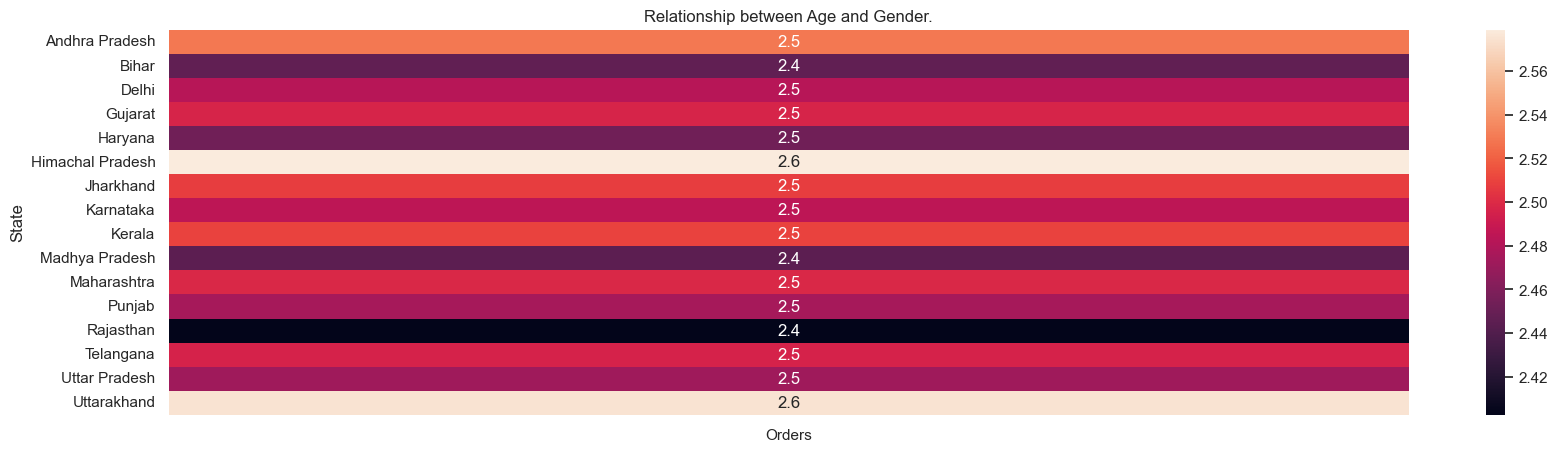

In [68]:
gb2 = df.groupby("State").agg({"Orders":'mean'})
print(gb2)
sns.heatmap(gb2,annot=True)
plt.title("Relationship between Age and Gender.")
plt.show()

                        Amount
State                         
Andhra Pradesh     9910.167694
Bihar              9269.025346
Delhi             10510.704710
Gujarat            9241.409836
Haryana            9336.670354
Himachal Pradesh   8163.434211
Jharkhand          7964.357895
Karnataka         10370.812883
Kerala             8597.110375
Madhya Pradesh     8796.028230
Maharashtra        9460.683934
Punjab             7629.000000
Rajasthan          8265.839827
Telangana          9211.920000
Uttar Pradesh      9966.547325
Uttarakhand        7877.950000


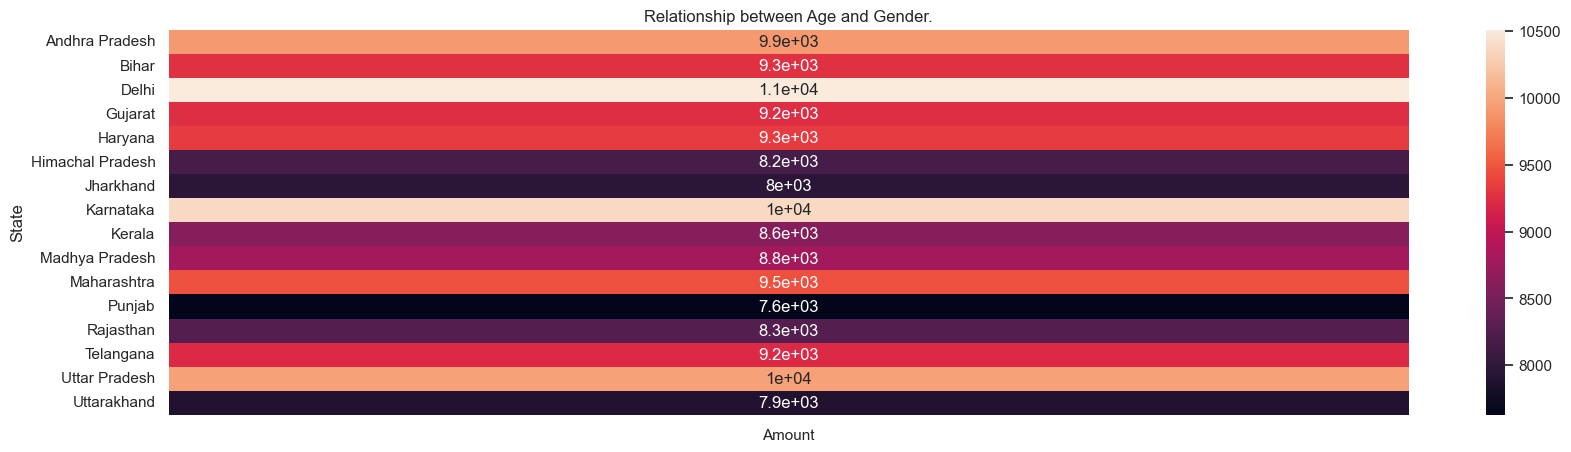

In [74]:
gb3 = df.groupby("State").agg({"Amount":'mean'})
print(gb3)
sns.heatmap(gb3,annot=True)
plt.title("Relationship between State and Amount.")
plt.show()

In [75]:
# #import libraries
# from powerbiclient import QuickVisualize,get_dataset_config,Report
# from powerbiclient.authentication import DeviceCodeLoginAuthentication
# # Authenticate to Power BI service using InteractiveLoginAuthentication
# from powerbiclient.authentication import InteractiveLoginAuthentication
# # import pandas as pd

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!